In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Mean: 43.88973
Std: 12.856385
(570400,)


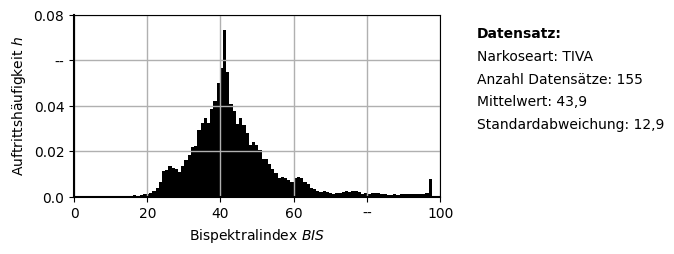

In [95]:
data = np.load('00_bis.npz')
bis = np.concatenate((data['train'], data['test'], data['validation']), axis=0).flatten()

bis[bis == 0.0] = np.nan

plt.figure(figsize=(12/2.54, 6/2.54))
plt.rcParams['font.size'] = 10

# Colors
color1 = (0, 0, 0)
color2 = (1, 1, 1)
color3 = (159/255, 182/255, 196/255)
color4 = (125/255, 102/255, 102/255)
color5 = (153/255, 0, 0)

plt.hist(bis, bins=100, density=True, color='black')
plt.xlabel('Bispektralindex $BIS$')
plt.ylabel('Auftrittshäufigkeit $h$')

#plt.legend(loc='lower center', bbox_to_anchor=(1.25, 0.7))

# Axis settings
ax = plt.gca()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

ax.set_ylim(bottom=0, top=0.08)
ax.set_xlim(left=0, right=100)

# Einheiten auf x-Achse
ticks = ax.get_xticks()
ticks = [int(tick) for tick in ticks]
ticks_with_units = [xunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_with_units)

# Einheiten auf y-Achse
yunit = '--'
ticks = ax.get_yticks()
ticks = [float(tick) for tick in ticks]
ticks_with_units = [yunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks_with_units)

plt.grid(True, linewidth=1.0)

plt.text(110, 0.07, s='Datensatz:', fontsize=10, fontweight='bold')
plt.text(110, 0.06, s='Narkoseart: TIVA', fontsize=10)
plt.text(110, 0.05, s='Anzahl Datensätze: 155', fontsize=10)
plt.text(110, 0.04, s='Mittelwert: 43,9', fontsize=10)
plt.text(110, 0.03, s='Standardabweichung: 12,9', fontsize=10)

print('Mean:', np.nanmean(bis))
print('Std:', np.nanstd(bis))
print(bis.shape)


plt.savefig('bis_histogram.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')

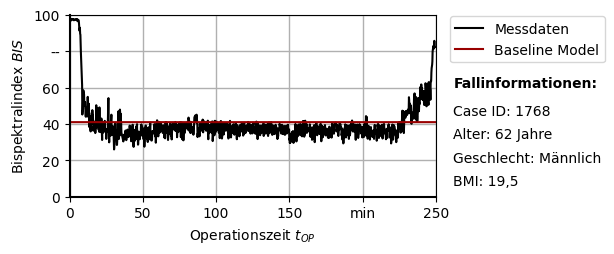

In [115]:
from tensorflow.keras.metrics import RootMeanSquaredError, MeanSquaredError, MeanAbsoluteError

data = np.load('00_bis.npz')
groundtruth = data['test']

j = 8

end = np.where(groundtruth[j] == 0)[0][0]

time = np.arange(0, groundtruth[j,:end].shape[0]) * 10 / 60

groundtruth = groundtruth[j,:end]

baseline = np.ones(groundtruth.shape) * 41.0

plt.figure(figsize=(12/2.54, 6/2.54))
plt.rcParams['font.size'] = 10

# Colors
color1 = (0, 0, 0)
color2 = (1, 1, 1)
color3 = (159/255, 182/255, 196/255)
color4 = (125/255, 102/255, 102/255)
color5 = (153/255, 0, 0)

plt.plot(time,groundtruth, label='Messdaten', color=color1)
plt.plot(time,baseline, label='Baseline Model', color=color5)

plt.xlabel('Operationszeit $t_{OP}$')
plt.ylabel('Bispektralindex $BIS$')

plt.legend(loc='lower center', bbox_to_anchor=(1.25, 0.7))

# Axis settings
ax = plt.gca()
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Limits
ax.set_ylim(bottom=0, top=100)
ax.set_xlim(left=0, right=250)

# Einheiten auf x-Achse
xunit = 'min'
ticks = ax.get_xticks()
ticks = [int(tick) for tick in ticks]
ticks_with_units = [xunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks_with_units)

# Einheiten auf y-Achse
yunit = '--'
ticks = ax.get_yticks()
ticks = [int(tick) for tick in ticks]
ticks_with_units = [yunit if i == len(ticks) - 2 else ticks[i] for i in range(len(ticks))]
ax.set_yticks(ticks)
ax.set_yticklabels(ticks_with_units)

plt.grid(True, linewidth=1.0)

plt.text(262, 60, s='Fallinformationen:', fontweight='bold')
plt.text(262, 45, s='Case ID: 1768')
plt.text(262, 32, s='Alter: 62 Jahre')
plt.text(262, 19, s='Geschlecht: Männlich')
plt.text(262, 6,  s='BMI: 19,5')



plt.savefig('sample_baseline.pdf', bbox_inches='tight', pad_inches=0.2, format='pdf')